# About Dataset
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.



# Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns       # for drowing Boxplot
import matplotlib.pyplot as plt



In [14]:
dataFram=pd.read_csv('diabetes.csv')
dataFram.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# لمعرفة عدد العناصر و نوع البيانات لهم 
dataFram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pregnancies                780 non-null    int64  
 1   Glucose                    780 non-null    int64  
 2   BloodPressure              780 non-null    int64  
 3   SkinThickness              780 non-null    int64  
 4   Insulin                    780 non-null    int64  
 5   BMI                        780 non-null    float64
 6   DiabetesPedigreeFunction   780 non-null    float64
 7   Age                        780 non-null    int64  
 8   Outcome                    780 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 55.0 KB


In [9]:
# لمعرفه الكبر قيمه واقل قيمه وهل التوزيع صحيح و المتوصط صحيح
dataFram.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,3.862821,120.930769,68.991026,20.528205,79.743590,31.947308,0.473223,33.402564,0.348718
std,3.388859,31.952795,19.392008,15.947377,114.824757,7.874528,0.329999,11.987134,0.476870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.200000,0.244750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.378000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# هنا ازيل المسافه بين اسماء الاعمده وهذا يجعلنا نتجنب المشاكل 
dataFram.columns = dataFram.columns.str.strip()

# 1. processing Missing values

In [234]:
# لكي نشوف عدد القيم المفقوده ولكنه لن تظهر وهذا بسبب انه تم استبدالها بقيمه صفر
dataFram.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [235]:
# افوم باستبدال الصفر بقيمه مفقود في الاعمده التي تكون فيها الصفر غير منطقي
# replace missing values
zero_columns = dataFram.columns[1:-1]  # all featrure without outcome feature using slicing
dataFram[zero_columns] = dataFram[zero_columns].replace(0, np.nan)
#dataFram.fillna(dataFram.median(), inplace=True)

#zero_columns.pop() # لا يمكننا استخدام هذهالداله لانها هنا ليست list وانما مجموعه من ال object واستخدمت طريقة ال slicing
# print(zero_columns)

In [236]:
dataFram.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [237]:
dataFram.fillna(dataFram.median(), inplace=True)

# 2. Remove duplicated data

In [16]:
print(dataFram.duplicated().sum())

12


In [17]:
dataFram.drop_duplicates(inplace=True)
print(dataFram.duplicated().sum())

0


# 3.Histogram plot befor cleaning 

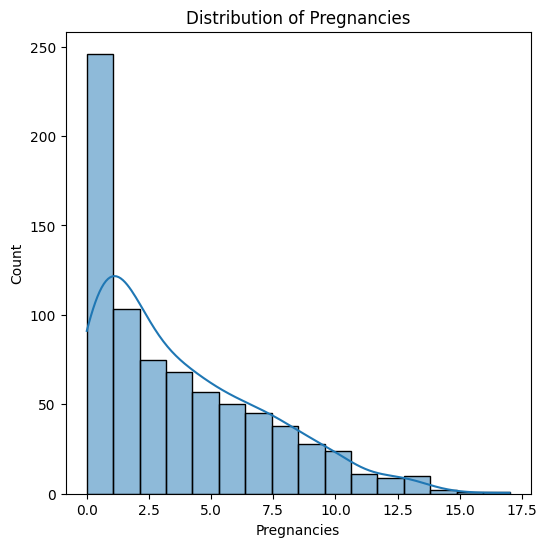

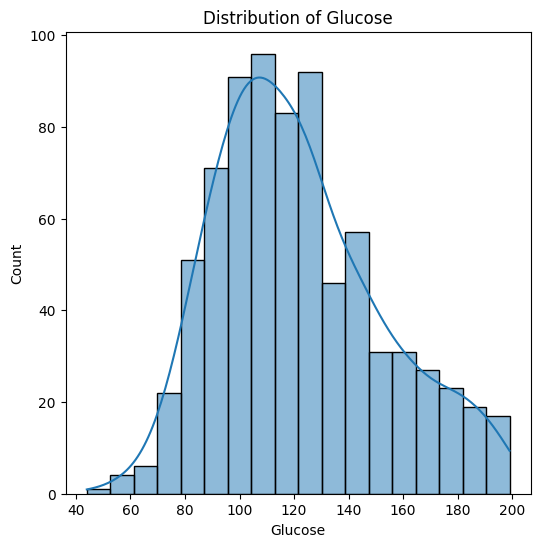

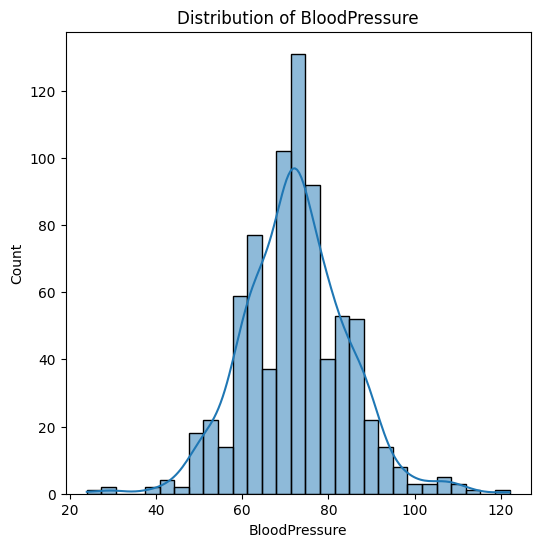

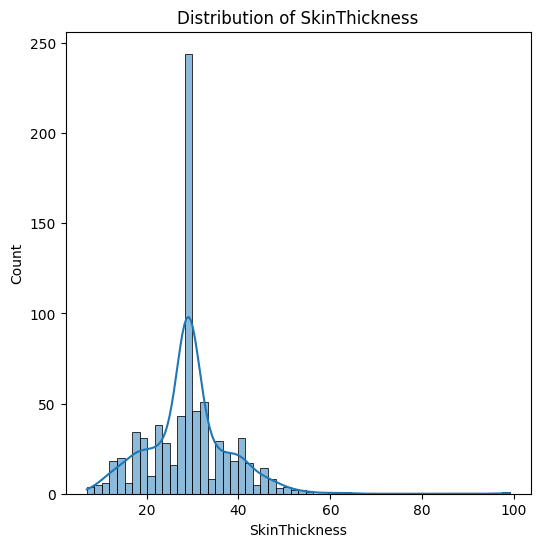

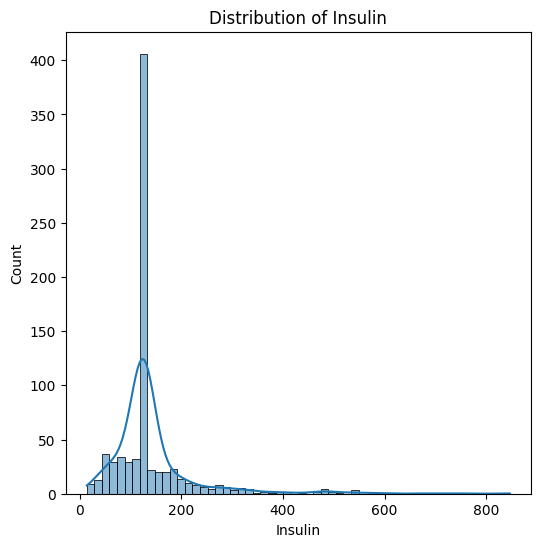

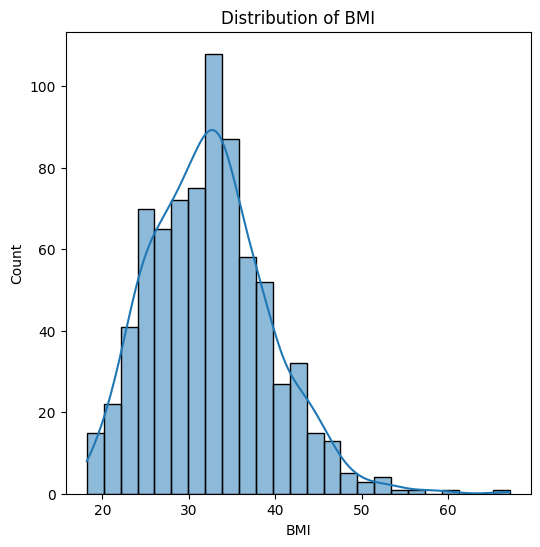

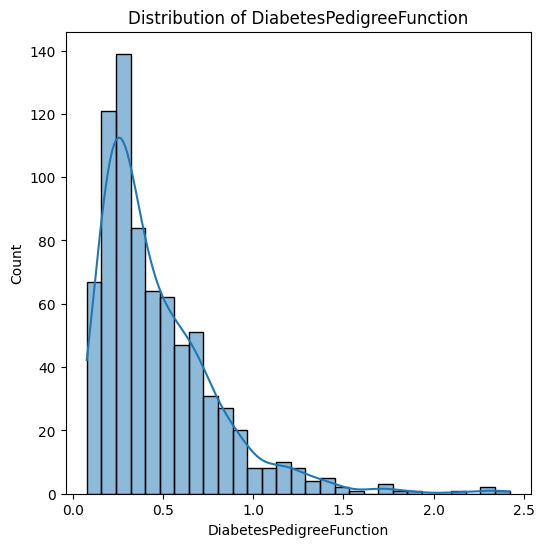

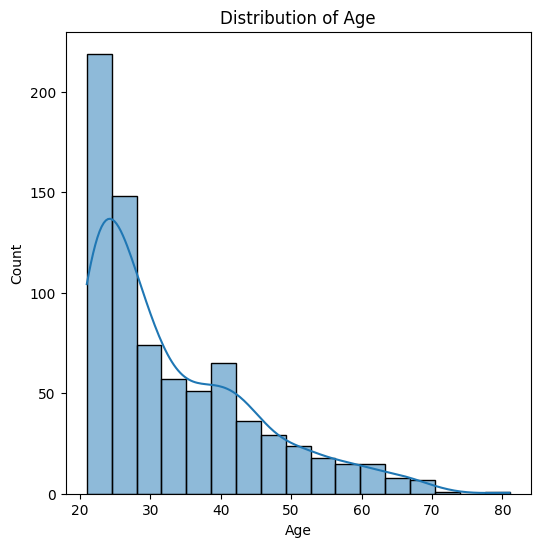

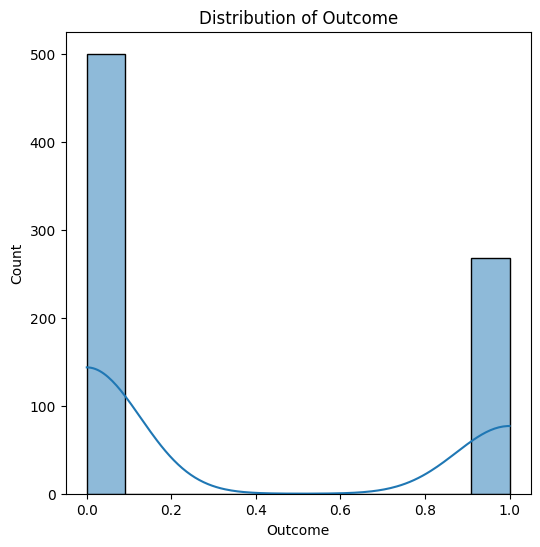

In [238]:
for col in dataFram.columns:
    plt.figure(figsize=(6, 6))
    sns.histplot(dataFram[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Calculate the Skewness for each column

هنا لمعرفه النوزيع البيانات ونعرف هل التوزيع طبيعي او يميل الى اليمين او اليسار

الرقم اذا كان قريب من الصفر كان افضل 
بحيث الارفام التي بين ال 0.5 و -0.5 فانه يمكن قبوله اما اكان اكثر مثلا 0.9 فانه بدا يميل الى اليمين و العكس ولذلك يجب علينا اصلحها باستخدام ال 

log transform

In [239]:
print("Skewness values:")
print(dataFram.skew())

Skewness values:
Pregnancies                 0.901674
Glucose                     0.535587
BloodPressure               0.141885
SkinThickness               0.837608
Insulin                     3.380019
BMI                         0.599233
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64


# BoxPlot drew

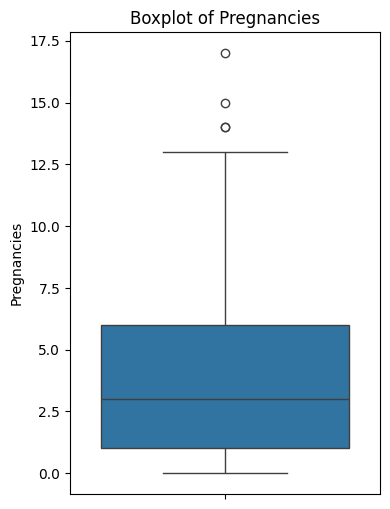

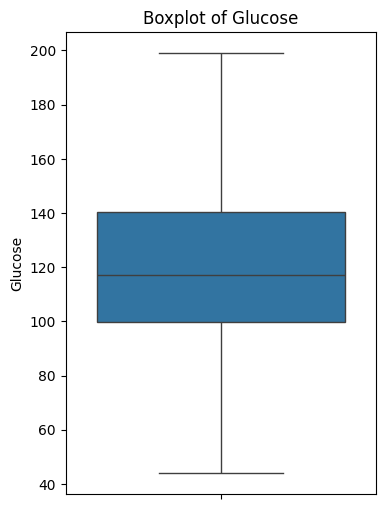

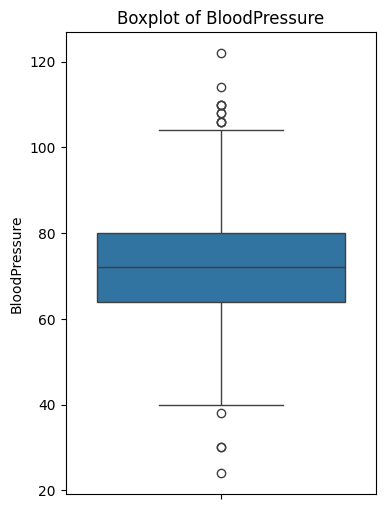

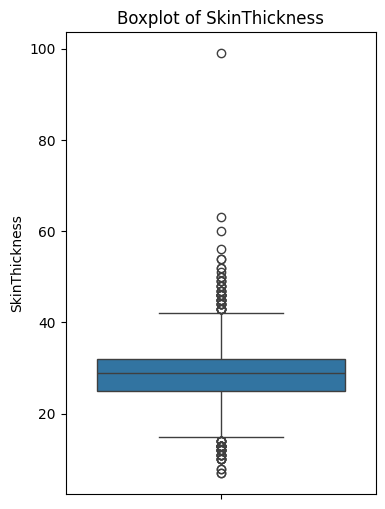

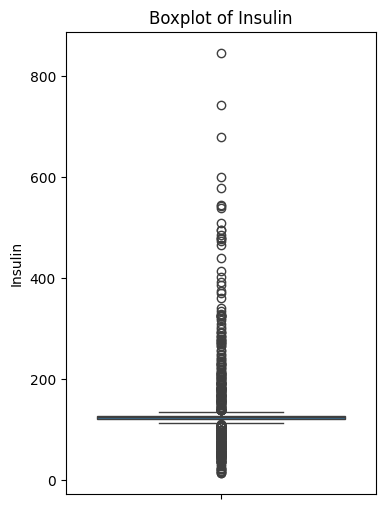

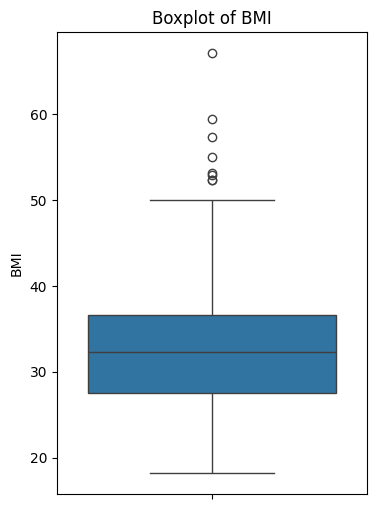

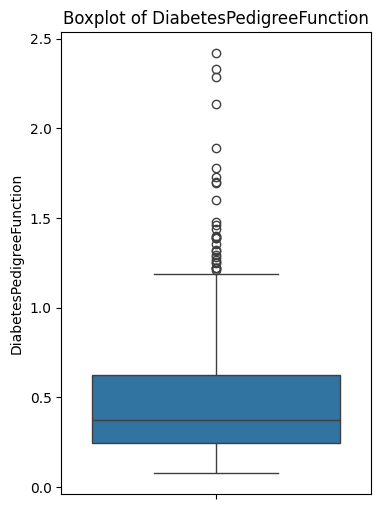

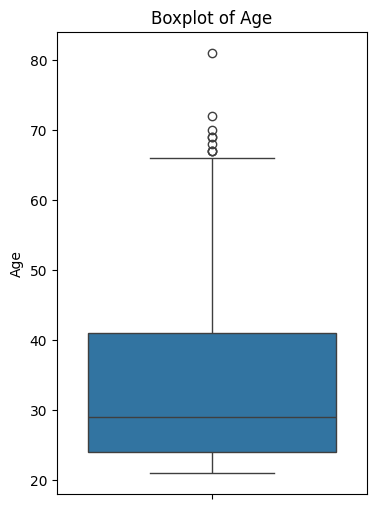

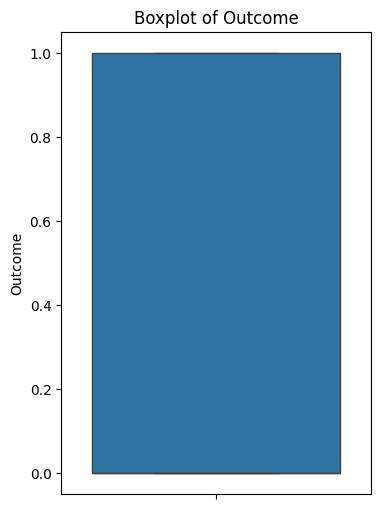

In [242]:
for col in dataFram.columns:
    plt.figure(figsize=(4, 6))
    sns.boxplot(y=dataFram[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Correlation
انا توصلت انه لا يمكن حساب الارتباط في يبانات التي من نوع تصنيف

In [243]:
# هنا نختار فقط الأعمدة الرقمية من الجدول لأن الاتباط يتم حسابه فقط على الأرقام.
data_num = dataFram.select_dtypes(include = ['float64', 'int64'])  

#حساب الارتباط مع SalePrice
data_num_corr = data_num.corr()['Outcome'][:-1] # -1 means that the latest row is SalePrice

top_features = data_num_corr[abs(data_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 0 strongly correlated values with SalePrice:
Series([], Name: Outcome, dtype: float64)


# outlier handeling

In [244]:
# show the number of outliers for each columns
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # print(f'{col} -> [{lower},{upper}]')
    # outliers = data[(data[col] < lower) | (data[col] > upper)]
    print(f"{col}\t → Number of outliers: {len(outliers)}\n")

    # تعديل القيم بدلًا من حذفها
    data[col] = data[col].apply(
        lambda x: upper if x > upper else (lower if x < lower else x)
    )


for col in dataFram.columns[1:-1]:
    detect_outliers_iqr(dataFram, col)
    

Glucose	 → Number of outliers: 9

BloodPressure	 → Number of outliers: 9

SkinThickness	 → Number of outliers: 9

Insulin	 → Number of outliers: 9

BMI	 → Number of outliers: 9

DiabetesPedigreeFunction	 → Number of outliers: 9

Age	 → Number of outliers: 9



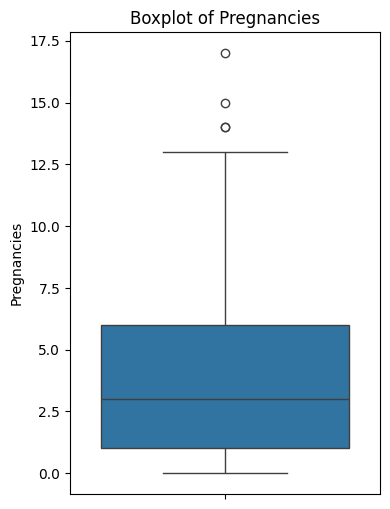

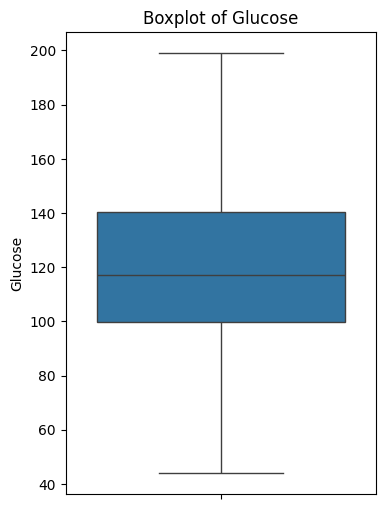

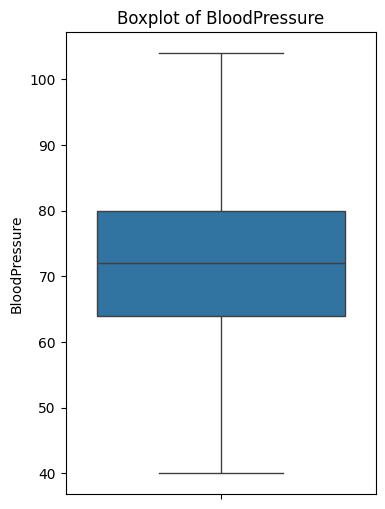

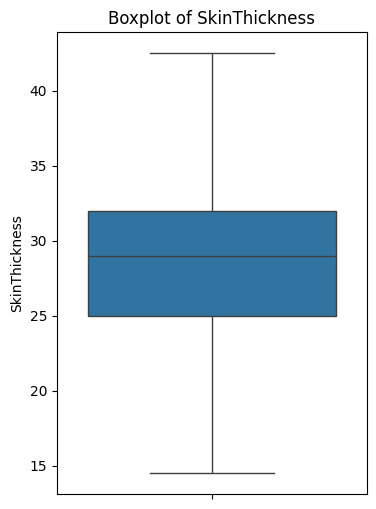

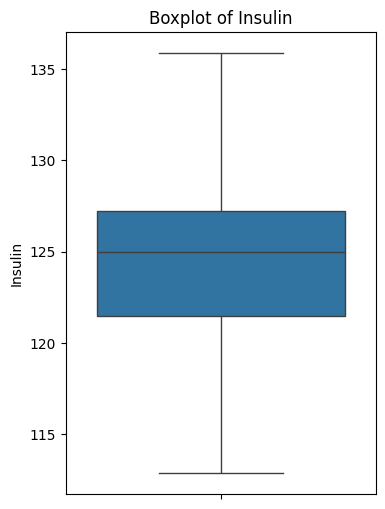

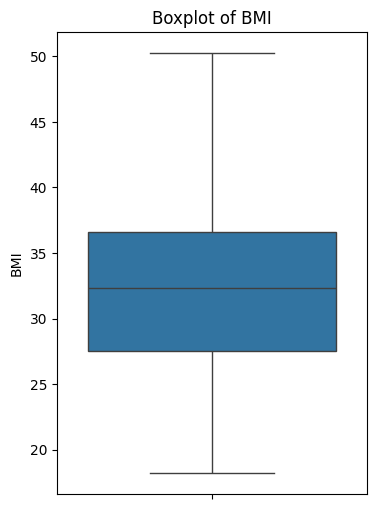

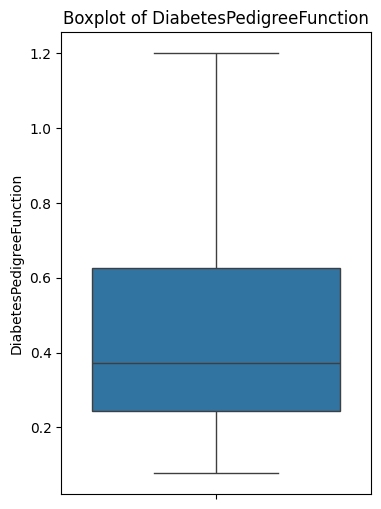

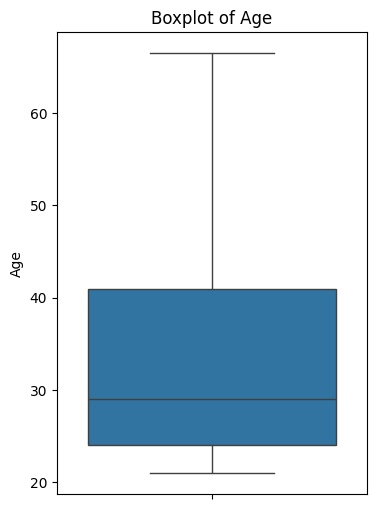

In [245]:
for col in dataFram.columns[:-1]:
    plt.figure(figsize=(4, 6))
    sns.boxplot(y=dataFram[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Fix the distribution (if skewness is large)

In [ ]:
cols_to_fix = ['Insulin', 'BMI', 'SkinThickness', 'DiabetesPedigreeFunction']

for col in cols_to_fix:
    dataFram[col] = np.log1(dataFram[col])

In [247]:
print(dataFram.skew())

Pregnancies                 0.901674
Glucose                     0.535587
BloodPressure               0.105665
SkinThickness              -0.703237
Insulin                    -0.218633
BMI                        -0.139857
DiabetesPedigreeFunction    0.703791
Age                         1.067170
Outcome                     0.635017
dtype: float64


In [249]:
dataFram.to_csv('cleanedData.csv')